<a href="https://colab.research.google.com/github/Sorrakorn/Sorrakorn/blob/main/PAM%20clustering%20for%20heterogeneous%20data%20by%20using%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Partitioning around medoids (PAM) clustering for heterogeneous data by using Python programming**
**Content**

1. Introduction
2. Problem Statement
3. Dataset
4. Data Exploration
5. Data Preprocessing
6. Methodology / Approach
7. Experimental Results
8. Data visualization

**1. Introduction**

Cluster analysis is a vital exploratory tool in data structure investigation. However, clustering heterogeneous data which is commonly found in real-life practice is challenging, especially among the newbie data scientists. Therefore, this project had been set up to apply some techniques used in previously published research with the heterogeneous dataset (comprised of both continuous variable and categorical variable) to categorize the data into a group as part of the data exploration process. Before data clustering, data pre-processing is needed e. g. data normalization, standardization, missing value management, etc. to clean the data. This project also utilized some data visualization techniques to illustrate exploratory data analysis (EDA) results which were valuable for further analysis to obtain valuable insights and pieces of knowledge. 


**2. Problem Statement**

This project was aimed to leverage the relevant knowledge about data exploration and preparation to implementing the Python notebook for EDA. However, the way to manage heterogeneous data is more challenging and complex compared to homogenous data. Also, most publications normally use R programming, not Python-based programming to perform the EDA. Therefore, this project will be an experiment to help all interested learners and the project initiators to learn and get more familiar with using Python languages to do EDA for heterogeneous data. Moreover, it can be possible to help generate new hypothesis which can be applied as any further research questions in the data science area. 


**3. Dataset**

This project had utilized the customer segmentation dataset published by Vetrivel P.S. in Kaggle. (Available: https://www.kaggle.com/vetrirah/customer ). The original dataset was adapted to be more compact for this project.  The train table (8,068 rows) and test table (2,627 rows) were consolidated, giving a total of 10,695 rows. Only 5 columns (ID, Gender, Age, Profession, and Spending score) were selected. 162 rows were excluded due to having at least any missing values (all missing values were from the profession column). Therefore, the project dataset was comprised of 10,533 rows and 5 columns with no missing value.

**Download dataset of this project:** https://www.kaggle.com/sorrakornj/customer-segmentation-compact

In [ ]:
# importing basic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.1.5
numpy version: 1.19.5
seaborn version: 0.11.1


In [ ]:
# Reading data
customer_data = pd.read_csv('/content/Customer Segmentation_compact.csv')
print('There are {} rows and {} columns in our dataset'.format(customer_data.shape[0],customer_data.shape[1]))

There are 10533 rows and 5 columns in our dataset


**4. Data Exploration**

In [ ]:
customer_data.head()

,ID,Gender,Age,Profession,Spending_Score
0,461319,Male,56,Artist,Average
1,465176,Female,55,Artist,Average
2,464291,Female,79,Artist,High
3,465602,Male,33,Artist,Low
4,459168,Female,36,Artist,Low


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10533 entries, 0 to 10532
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              10533 non-null  int64 
 1   Gender          10533 non-null  object
 2   Age             10533 non-null  int64 
 3   Profession      10533 non-null  object
 4   Spending_Score  10533 non-null  object
dtypes: int64(2), object(3)
memory usage: 411.6+ KB


In [ ]:
#change data type of ID to string
data_types_dict = {'ID': str}
customer_data = customer_data.astype(data_types_dict)
customer_data.dtypes

ID                object
Gender            object
Age                int64
Profession        object
Spending_Score    object
dtype: object

In [ ]:
# check if each ID is duplicate or not
list_id_unique = pd.unique(customer_data['ID'])
len(list_id_unique)

8235

In [ ]:
#Dataframe with only non-duplicated IDs
customer_data_unique = customer_data.drop_duplicates(subset=['ID'], keep=False)
print(customer_data_unique)

           ID  Gender  Age Profession Spending_Score
2      464291  Female   79     Artist           High
4      459168  Female   36     Artist            Low
5      465083    Male   56     Artist        Average
6      459717    Male   49     Artist        Average
7      465882    Male   35     Artist            Low
...       ...     ...  ...        ...            ...
10494  463835    Male   32  Marketing            Low
10504  464792    Male   30  Marketing           High
10509  465813    Male   28  Marketing            Low
10516  466427  Female   25  Marketing            Low
10517  466527  Female   49  Marketing            Low

[5937 rows x 5 columns]


In [ ]:
#explore duplicated IDs (All duplicate IDs shown)
id_duplicated = customer_data[customer_data.duplicated(subset=['ID'],keep=False)]
print(id_duplicated.sort_values(by=['ID']))

          ID  Gender  Age  Profession Spending_Score
4678  458989  Female   42    Engineer            Low
4947  458989  Female   36    Engineer            Low
8540  458994    Male   37  Healthcare        Average
8203  458994    Male   38  Healthcare        Average
6968  459000    Male   58   Executive           High
...      ...     ...  ...         ...            ...
7955  467954    Male   31  Healthcare            Low
4247  467958  Female   35      Doctor            Low
3794  467958  Female   43      Doctor            Low
6963  467961    Male   45   Executive           High
7207  467961    Male   47   Executive           High

[4596 rows x 5 columns]


In [ ]:
#explore duplicated IDs (Keep only last entry as unique value)
id_duplicated_select = customer_data[customer_data.duplicated(subset=['ID'],keep='last')]
print(id_duplicated_select.sort_values(by=['ID']))

           ID  Gender  Age     Profession Spending_Score
4678   458989  Female   42       Engineer            Low
8203   458994    Male   38     Healthcare        Average
6968   459000    Male   58      Executive           High
10251  459001  Female   20      Marketing            Low
3774   459003    Male   51         Doctor           High
...       ...     ...  ...            ...            ...
7381   467949    Male   22     Healthcare            Low
6081   467950  Female   38  Entertainment            Low
7955   467954    Male   31     Healthcare            Low
3794   467958  Female   43         Doctor            Low
6963   467961    Male   45      Executive           High

[2298 rows x 5 columns]


In [ ]:
#Combine DataFrames with 'only unique IDs' and 'selected unique IDs from duplicates' together
customer_data = customer_data_unique.append(id_duplicated_select)

In [ ]:
customer_data.describe()

,Age
count,8235.000000
mean,43.431208
std,16.741269
min,18.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,89.000000


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8235 entries, 2 to 10416
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              8235 non-null   object
 1   Gender          8235 non-null   object
 2   Age             8235 non-null   int64 
 3   Profession      8235 non-null   object
 4   Spending_Score  8235 non-null   object
dtypes: int64(1), object(4)
memory usage: 386.0+ KB


**Distributions of numerical variable (Age)**

Distributions of the numerical variable will be investigated in detail. Data will be stratified by categorical variables.

**Age VS Gender**

There were total 4,511 males (54.8%) and 3,724* females (45.2%). The distribution of samples’ age separately between males and females was illustrated (see figure). It was not a significantly different distribution pattern between males and females (Kolgomorov-Smirnov test p-value = 1.00). 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


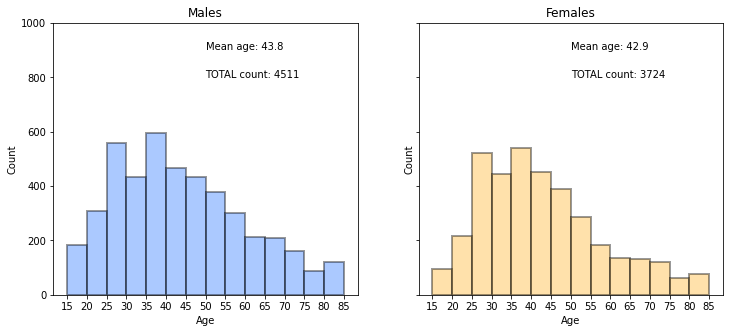

In [ ]:
#Exploratory Data Analysis
#############################

#Distributions --- distributions of numerical variables will be investigated in detail. Data will be stratified by categorical variable.

#Age VS Gender
males_age = customer_data[customer_data['Gender']=='Male']['Age'] # subset with males age
females_age = customer_data[customer_data['Gender']=='Female']['Age'] # subset with females age

age_bins = range(15,90,5)

# males histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#2e79ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=1000)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,800, "TOTAL count: {}".format(males_age.count()))
ax1.text(50,900, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#ffb42e', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,800, "TOTAL count: {}".format(females_age.count()))
ax2.text(50,900, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

**Kolgomorov-Smirnov test**
[link text](https://www.geeksforgeeks.org/kolmogorov-smirnov-test-ks-test/?ref=rp)

In [ ]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 1.00


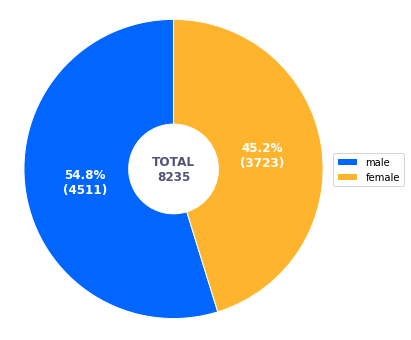

In [ ]:
#Donut plot (Gender)
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()] # wedge sizes

fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['#0066ff','#ffb42e'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male','female'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(customer_data['Age'].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')  # Equal aspect ratio
plt.show()

**Age VS Profession**

There were 9 distinct categories of professions (Artist, Doctor, Engineer, Entertainment, Executive, Healthcare, Homemaker, Lawyer, Marketing). From the below figures, it could be noticed that most of the samples with healthcare profession aged under 35 years (averaged age = 26.8 years). In contrast, most of the samples with lawyer profession aged above 65 years (averaged age = 75.2 years). 

In [ ]:
#Age VS Profession
list_profession = pd.unique(customer_data['Profession'])
print(list_profession)

['Artist' 'Doctor' 'Engineer' 'Entertainment' 'Executive' 'Healthcare'
 'Homemaker' 'Lawyer' 'Marketing']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


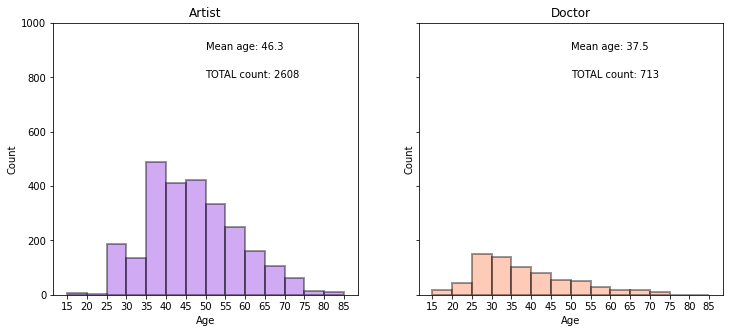

In [ ]:
#Age VS Profession
artist_age = customer_data[customer_data['Profession']=='Artist']['Age'] 
doctor_age = customer_data[customer_data['Profession']=='Doctor']['Age'] 
engineer_age = customer_data[customer_data['Profession']=='Engineer']['Age'] 
entertainment_age = customer_data[customer_data['Profession']=='Entertainment']['Age'] 
executive_age = customer_data[customer_data['Profession']=='Executive']['Age'] 
healthcare_age = customer_data[customer_data['Profession']=='Healthcare']['Age'] 
homemaker_age = customer_data[customer_data['Profession']=='Homemaker']['Age'] 
lawyer_age = customer_data[customer_data['Profession']=='Lawyer']['Age'] 
marketing_age = customer_data[customer_data['Profession']=='Marketing']['Age'] 

age_bins = range(15,90,5)

# artist histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(artist_age, bins=age_bins, kde=False, color='#8a2be2', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=1000)
ax1.set_title('Artist')
ax1.set_ylabel('Count')
ax1.text(50,800, "TOTAL count: {}".format(artist_age.count()))
ax1.text(50,900, "Mean age: {:.1f}".format(artist_age.mean()))

# doctor histogram
sns.distplot(doctor_age, bins=age_bins, kde=False, color='#ff7f50', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Doctor')
ax2.set_ylabel('Count')
ax2.text(50,800, "TOTAL count: {}".format(doctor_age.count()))
ax2.text(50,900, "Mean age: {:.1f}".format(doctor_age.mean()))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


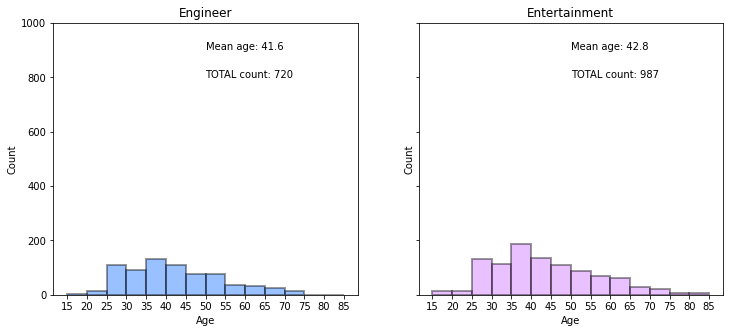

In [ ]:
# Engineer histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(engineer_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=1000)
ax1.set_title('Engineer')
ax1.set_ylabel('Count')
ax1.text(50,800, "TOTAL count: {}".format(engineer_age.count()))
ax1.text(50,900, "Mean age: {:.1f}".format(engineer_age.mean()))

# Entertainment histogram
sns.distplot(entertainment_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Entertainment')
ax2.set_ylabel('Count')
ax2.text(50,800, "TOTAL count: {}".format(entertainment_age.count()))
ax2.text(50,900, "Mean age: {:.1f}".format(entertainment_age.mean()))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


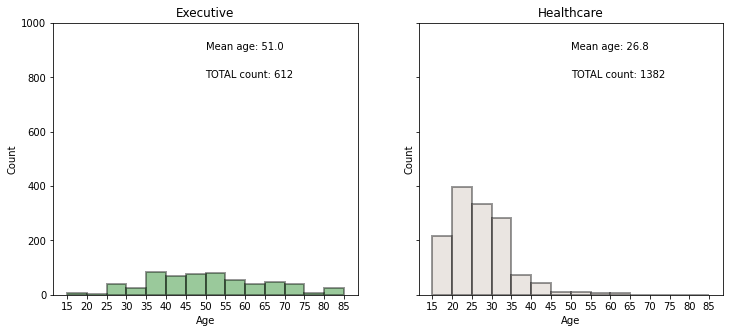

In [ ]:
# Executive histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(executive_age, bins=age_bins, kde=False, color='#047806', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=1000)
ax1.set_title('Executive')
ax1.set_ylabel('Count')
ax1.text(50,800, "TOTAL count: {}".format(executive_age.count()))
ax1.text(50,900, "Mean age: {:.1f}".format(executive_age.mean()))

# Healthcare histogram
sns.distplot(healthcare_age, bins=age_bins, kde=False, color='#cbbeb5', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Healthcare')
ax2.set_ylabel('Count')
ax2.text(50,800, "TOTAL count: {}".format(healthcare_age.count()))
ax2.text(50,900, "Mean age: {:.1f}".format(healthcare_age.mean()))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


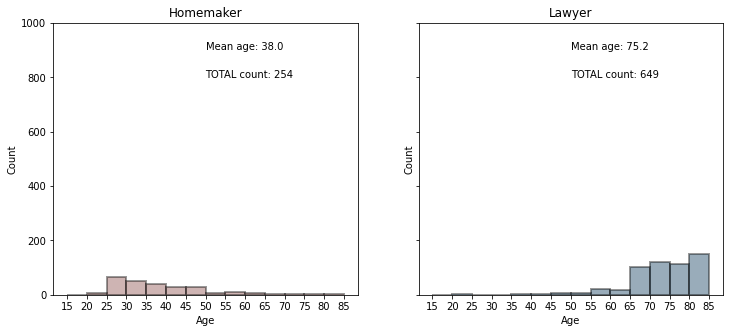

In [ ]:
# Homemaker histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(homemaker_age, bins=age_bins, kde=False, color='#854442', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=1000)
ax1.set_title('Homemaker')
ax1.set_ylabel('Count')
ax1.text(50,800, "TOTAL count: {}".format(homemaker_age.count()))
ax1.text(50,900, "Mean age: {:.1f}".format(homemaker_age.mean()))

# Lawyer histogram
sns.distplot(lawyer_age, bins=age_bins, kde=False, color='#003153', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Lawyer')
ax2.set_ylabel('Count')
ax2.text(50,800, "TOTAL count: {}".format(lawyer_age.count()))
ax2.text(50,900, "Mean age: {:.1f}".format(lawyer_age.mean()))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


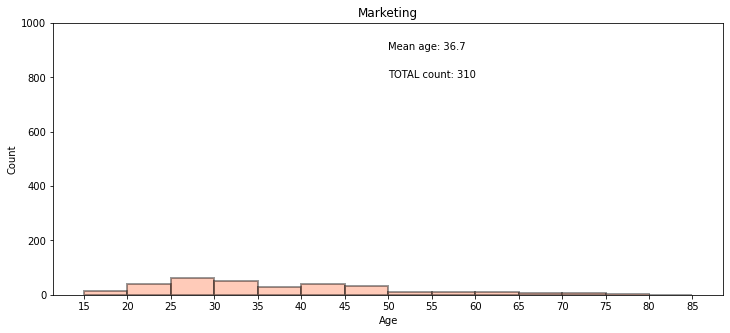

In [ ]:
# Marketing histogram
fig, (ax1) = plt.subplots(1, 1, figsize=(12,5), sharey=True)
sns.distplot(marketing_age, bins=age_bins, kde=False, color='#ff7f50', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=1000)
ax1.set_title('Marketing')
ax1.set_ylabel('Count')
ax1.text(50,800, "TOTAL count: {}".format(marketing_age.count()))
ax1.text(50,900, "Mean age: {:.1f}".format(marketing_age.mean()))

plt.show()

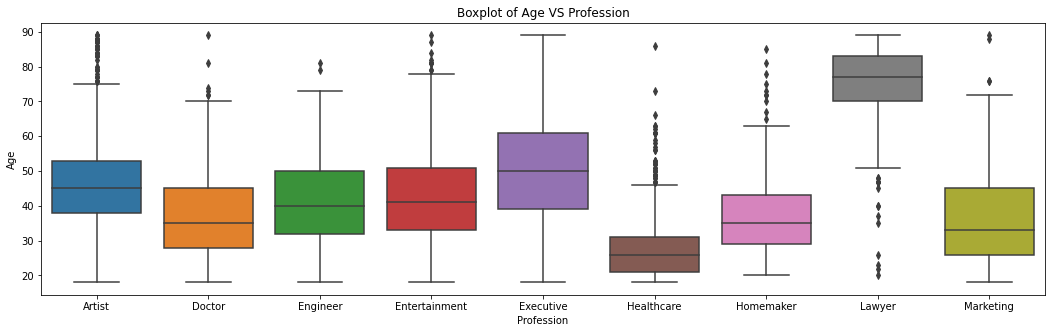

In [ ]:
# boxplot Age VS Profession
fig, (ax1) = plt.subplots(1,1, figsize=(18,5))
sns.boxplot(x='Profession', y='Age', data=customer_data, ax=ax1)
ax1.set_title('Boxplot of Age VS Profession')
plt.show()

**Age VS Spending score**

There were 3 levels of spending score (Average, High, Low). From the below figures, it could be noticed that the most majority of the samples had low spending scores and most of them were working adults (averaged age = 38.4 years). Contrastingly, high spending score samples were the least majority of samples and aged between 35 to 85 years (averaged age = 57.9 years).

In [ ]:
list_spending_score = pd.unique(customer_data['Spending_Score'])
print(list_spending_score)

['High' 'Low' 'Average']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


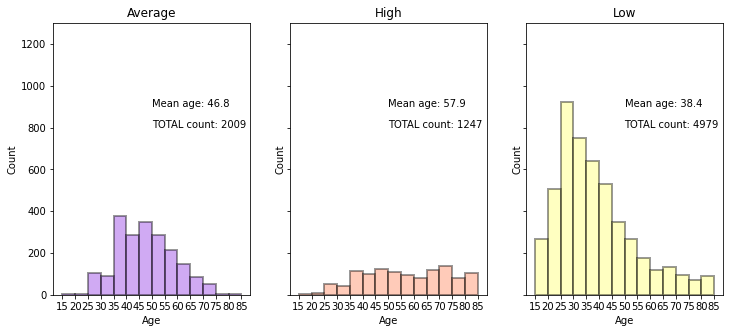

In [ ]:
#Age VS Spending_Score
average_age = customer_data[customer_data['Spending_Score']=='Average']['Age'] 
high_age = customer_data[customer_data['Spending_Score']=='High']['Age'] 
low_age = customer_data[customer_data['Spending_Score']=='Low']['Age'] 

age_bins = range(15,90,5)

# Average histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5), sharey=True)
sns.distplot(average_age, bins=age_bins, kde=False, color='#8a2be2', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=1300)
ax1.set_title('Average')
ax1.set_ylabel('Count')
ax1.text(50,800, "TOTAL count: {}".format(average_age.count()))
ax1.text(50,900, "Mean age: {:.1f}".format(average_age.mean()))

# High histogram
sns.distplot(high_age, bins=age_bins, kde=False, color='#ff7f50', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('High')
ax2.set_ylabel('Count')
ax2.text(50,800, "TOTAL count: {}".format(high_age.count()))
ax2.text(50,900, "Mean age: {:.1f}".format(high_age.mean()))

# Low histogram
sns.distplot(low_age, bins=age_bins, kde=False, color='#ffff66', ax=ax3, hist_kws=dict(edgecolor="k", linewidth=2))
ax3.set_xticks(age_bins)
ax3.set_title('Low')
ax3.set_ylabel('Count')
ax3.text(50,800, "TOTAL count: {}".format(low_age.count()))
ax3.text(50,900, "Mean age: {:.1f}".format(low_age.mean()))

plt.show()

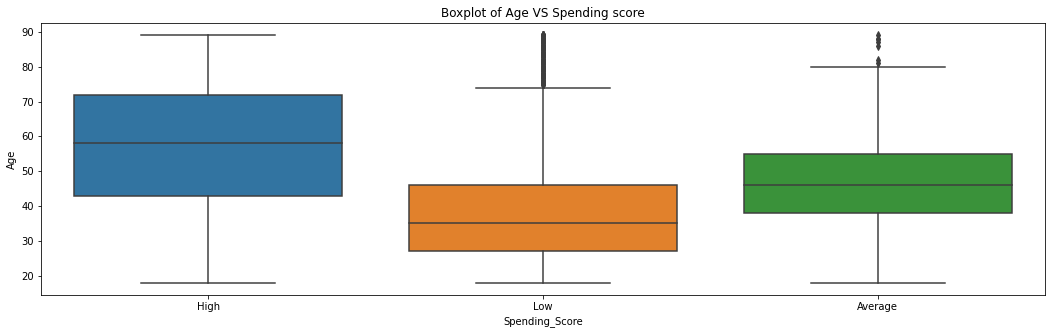

In [ ]:
# boxplot Age VS Spending_Score
fig, (ax1) = plt.subplots(1,1, figsize=(18,5))
sns.boxplot(x='Spending_Score', y='Age', data=customer_data, ax=ax1)
ax1.set_title('Boxplot of Age VS Spending score')
plt.show()

**Distributions of categorical variables**

**Gender VS Spending score**

The table below showed each level of spending score categorized by gender. Many males had a low spending score same as many females. As the p-value of the Chi-square test for independence was 0.0, it could be interpreted that the spending score was significantly dependent on the gender variable. More details of the relationship between both variables could be obtained from further analysis, but not in this project. 

In [ ]:
# Gender VS Spending_Score
# Crosstab
cross_gender_spending = pd.crosstab(customer_data['Gender'],customer_data['Spending_Score'])
cross_gender_spending

Spending_Score,Average,High,Low
Gender,,,
Female,849,506,2369
Male,1160,741,2610


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('Female', 'High'),
               (0.0, 0.0, 0.4499663189818969, 0.13497556568810862)),
              (('Female', 'Low'),
               (0.0,
                0.1382868239662543,
                0.4499663189818969,
                0.6319310575397812)),
              (('Female', 'Average'),
               (0.0,
                0.7735291397841813,
                0.4499663189818969,
                0.22647086021581858)),
              (('Male', 'High'),
               (0.4549414433600063,
                0.0,
                0.5450585566399938,
                0.16317728114205007)),
              (('Male', 'Low'),
               (0.4549414433600063,
                0.16648853942019579,
                0.5450585566399938,
                0.5747539862088404)),
              (('Male', 'Average'),
               (0.4549414433600063,
                0.744553783907182,
                0.5450585566399938,
                0.255446216092818))]))

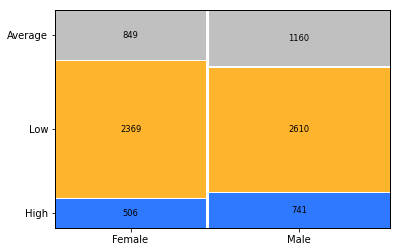

In [ ]:
# Gender VS Spending_Score
# Mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
props={}
props[('Male','High')]={'facecolor':'#2e79ff', 'edgecolor':'white'}
props[('Male','Average')]={'facecolor':'#c0c0c0', 'edgecolor':'white'}
props[('Male','Low')]={'facecolor':'#ffb42e', 'edgecolor':'white'}
props[('Female','High')]={'facecolor':'#2e79ff','edgecolor':'white'}
props[('Female','Average')]={'facecolor':'#c0c0c0','edgecolor':'white'}
props[('Female','Low')]={'facecolor':'#ffb42e','edgecolor':'white'}
labelizer=lambda k:{('Male','High'):741, ('Male','Average'):1160, ('Male','Low'):2610, ('Female','High'):506, ('Female','Average'):849, ('Female','Low'):2369}[k]
mosaic(customer_data,['Gender','Spending_Score'],labelizer=labelizer,properties=props)

**Chi-square Test**
[link text](https://www.kaggle.com/kuldeepnpatel/chi-square-test-of-independence)
[link text](https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests)

In [ ]:
# Chi-square Test For Independence
###################################
# Gender VS Spending_Score
gender_spending = customer_data[['Gender', 'Spending_Score']]

gender_spending_tab = pd.crosstab(gender_spending.Gender, gender_spending.Spending_Score, margins = True)

gender_spending_tab.columns = ["Average", "High", "Low","row_totals"]

gender_spending_tab.index = ["Female", "Male", "col_totals"]

observed = gender_spending_tab.iloc[0:2,0:3]   # Get table without totals for later use
gender_spending_tab

,Average,High,Low,row_totals
Female,849,506,2369,3724
Male,1160,741,2610,4511
col_totals,2009,1247,4979,8235


In [ ]:
expected =  np.outer(gender_spending_tab["row_totals"][0:2],
                     gender_spending_tab.loc["col_totals"][0:3]) / 10533

expected = pd.DataFrame(expected)

expected.columns = ["Average", "High", "Low"]
expected.index = ["Female", "Male"]

expected

,Average,High,Low
Female,710.292984,440.883699,1760.352796
Male,860.400551,534.056489,2132.371499


In [ ]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

538.6421324038325


In [ ]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence
                      df = 2)   # degree of freedom = (2-1)*(3-1) = 2

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=2)
print("P value")
print(p_value)

Critical value
5.991464547107979
P value
0.0


**Profession VS Spending score**

The table and boxplot below showed each level of spending score categorized by profession. It can be primarily observed that many samples in each profession had low spending scores, except for samples with executive profession and lawyer profession many of which had high spending scores. This aligned with the p-value of the Chi-square test for independence which was 0.0. This showed that spending score was dependent on the profession. More details of the relationship between both variables could be obtained from further analysis, but not in this project. 

In [ ]:
# Profession VS Spending_Score
# Crosstab
cross_profession_spending = pd.crosstab(customer_data['Profession'],customer_data['Spending_Score'])
cross_profession_spending

Spending_Score,Average,High,Low
Profession,,,
Artist,1044,250,1314
Doctor,186,33,494
Engineer,228,62,430
Entertainment,333,47,607
Executive,76,408,128
Healthcare,42,46,1294
Homemaker,62,27,165
Lawyer,19,339,291
Marketing,19,35,256


(<Figure size 1296x360 with 3 Axes>,
 OrderedDict([(('Artist', 'High'),
               (0.0, 0.0, 0.30451637009014054, 0.09522406858164384)),
              (('Artist', 'Low'),
               (0.0,
                0.09853532685978952,
                0.30451637009014054,
                0.5004977044651199)),
              (('Artist', 'Average'),
               (0.0,
                0.6023442896030552,
                0.30451637009014054,
                0.39765571039694464)),
              (('Doctor', 'High'),
               (0.3093240623978329,
                0.0,
                0.08325159964504227,
                0.045976797971447936)),
              (('Doctor', 'Low'),
               (0.3093240623978329,
                0.049288056249593634,
                0.08325159964504227,
                0.6882587332695539)),
              (('Doctor', 'Average'),
               (0.3093240623978329,
                0.7408580477972933,
                0.08325159964504227,
                0.259

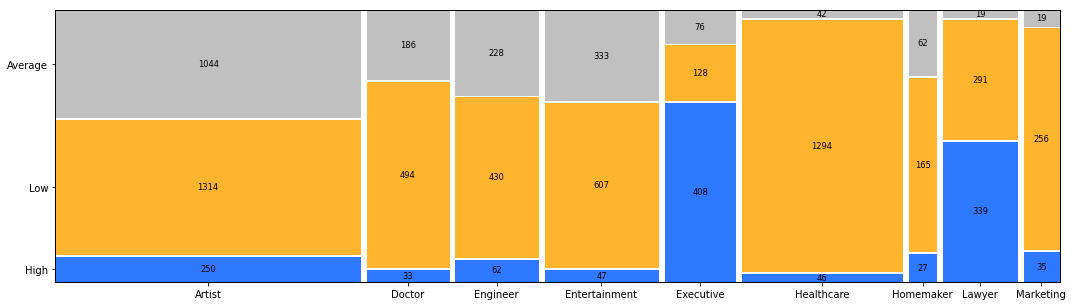

In [ ]:
# Profession VS Spending_Score
# Mosaic plot
props={}
props[('Artist','High')]={'facecolor':'#2e79ff', 'edgecolor':'white'}
props[('Artist','Average')]={'facecolor':'#c0c0c0', 'edgecolor':'white'}
props[('Artist','Low')]={'facecolor':'#ffb42e', 'edgecolor':'white'}
props[('Doctor','High')]={'facecolor':'#2e79ff','edgecolor':'white'}
props[('Doctor','Average')]={'facecolor':'#c0c0c0','edgecolor':'white'}
props[('Doctor','Low')]={'facecolor':'#ffb42e','edgecolor':'white'}
props[('Engineer','High')]={'facecolor':'#2e79ff','edgecolor':'white'}
props[('Engineer','Average')]={'facecolor':'#c0c0c0','edgecolor':'white'}
props[('Engineer','Low')]={'facecolor':'#ffb42e','edgecolor':'white'}
props[('Entertainment','High')]={'facecolor':'#2e79ff','edgecolor':'white'}
props[('Entertainment','Average')]={'facecolor':'#c0c0c0','edgecolor':'white'}
props[('Entertainment','Low')]={'facecolor':'#ffb42e','edgecolor':'white'}
props[('Executive','High')]={'facecolor':'#2e79ff','edgecolor':'white'}
props[('Executive','Average')]={'facecolor':'#c0c0c0','edgecolor':'white'}
props[('Executive','Low')]={'facecolor':'#ffb42e','edgecolor':'white'}
props[('Healthcare','High')]={'facecolor':'#2e79ff','edgecolor':'white'}
props[('Healthcare','Average')]={'facecolor':'#c0c0c0','edgecolor':'white'}
props[('Healthcare','Low')]={'facecolor':'#ffb42e','edgecolor':'white'}
props[('Homemaker','High')]={'facecolor':'#2e79ff','edgecolor':'white'}
props[('Homemaker','Average')]={'facecolor':'#c0c0c0','edgecolor':'white'}
props[('Homemaker','Low')]={'facecolor':'#ffb42e','edgecolor':'white'}
props[('Lawyer','High')]={'facecolor':'#2e79ff','edgecolor':'white'}
props[('Lawyer','Average')]={'facecolor':'#c0c0c0','edgecolor':'white'}
props[('Lawyer','Low')]={'facecolor':'#ffb42e','edgecolor':'white'}
props[('Marketing','High')]={'facecolor':'#2e79ff','edgecolor':'white'}
props[('Marketing','Average')]={'facecolor':'#c0c0c0','edgecolor':'white'}
props[('Marketing','Low')]={'facecolor':'#ffb42e','edgecolor':'white'}
labelizer=lambda k:{('Artist','High'):250, ('Artist','Average'):1044, ('Artist','Low'):1314, 
                    ('Doctor','High'):33, ('Doctor','Average'):186, ('Doctor','Low'):494,
                    ('Engineer','High'):62, ('Engineer','Average'):228, ('Engineer','Low'):430,
                    ('Entertainment','High'):47, ('Entertainment','Average'):333, ('Entertainment','Low'):607,
                    ('Executive','High'):408, ('Executive','Average'):76, ('Executive','Low'):128,
                    ('Healthcare','High'):46, ('Healthcare','Average'):42, ('Healthcare','Low'):1294,
                    ('Homemaker','High'):27, ('Homemaker','Average'):62, ('Homemaker','Low'):165,
                    ('Lawyer','High'):339, ('Lawyer','Average'):19, ('Lawyer','Low'):291,
                    ('Marketing','High'):35, ('Marketing','Average'):19, ('Marketing','Low'):256}[k]
plt.rcParams["figure.figsize"]=(18, 5)
mosaic(customer_data,['Profession','Spending_Score'],labelizer=labelizer,properties=props)

In [ ]:
# Chi-square Test For Independence
###################################
# Profession VS Spending_Score
profession_spending = customer_data[['Profession', 'Spending_Score']]

profession_spending_tab = pd.crosstab(profession_spending.Profession, profession_spending.Spending_Score, margins = True)

profession_spending_tab.columns = ["Average", "High", "Low","row_totals"]

profession_spending_tab.index = ['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive', 'Healthcare',
 'Homemaker', 'Lawyer', 'Marketing', 'col_totals']

observed = profession_spending_tab.iloc[0:2,0:3]   # Get table without totals for later use
profession_spending_tab

,Average,High,Low,row_totals
Artist,1044,250,1314,2608
Doctor,186,33,494,713
Engineer,228,62,430,720
Entertainment,333,47,607,987
Executive,76,408,128,612
Healthcare,42,46,1294,1382
Homemaker,62,27,165,254
Lawyer,19,339,291,649
Marketing,19,35,256,310
col_totals,2009,1247,4979,8235


In [ ]:
expected =  np.outer(profession_spending_tab["row_totals"][0:9],
                     profession_spending_tab.loc["col_totals"][0:3]) / 10533

expected = pd.DataFrame(expected)

expected.columns = ["Average", "High", "Low"]
expected.index = ['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive', 'Healthcare',
 'Homemaker', 'Lawyer', 'Marketing']

expected

,Average,High,Low
Artist,497.433969,308.760657,1232.814203
Doctor,135.993259,84.411943,337.038546
Engineer,137.328396,85.240672,340.347479
Entertainment,188.254343,116.850755,466.559670
Executive,116.729137,72.454571,289.295357
Healthcare,263.594228,163.614735,653.278078
Homemaker,48.446407,30.071015,120.067027
Lawyer,123.786291,76.834995,306.785436
Marketing,59.127504,36.700845,146.538498


In [ ]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

739.8794926869887


In [ ]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence
                      df = 16)   # degree of freedom = (9-1)*(3-1) = 16

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=16)
print("P value")
print(p_value)

Critical value
26.29622760486423
P value
0.0


**5. Data Preprocessing**

**Data transformation**

After EDA was done, before performing clustering analysis, the skewness of the distribution of age variable was checked as a part of the data preprocessing. It was found that the skewness of the distribution of the age variable was 0.70 which meant that the distribution was moderately skewed (skewness is between -1 and -0.5 or between 0.5 and 1). Therefore, it was necessary to normalize the skewness of distribution by transforming the values of age variables to natural logarithmic values. Then, the ‘Age’ and ‘ID’ columns were deleted, so the final data table before clustering analysis was shown in the table below. 

**Skewness interpretation**

If skewness is less than -1 or greater than 1, the distribution is highly skewed.

If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.


In [ ]:
# check for skewness of distribution of age
skew = customer_data['Age'].skew(axis = 0, skipna = True)
print(skew)

0.7025736959312436


In [ ]:
# Normalized skewness of distribution
# Calculate logarithm to base 2 
# on 'Age' column
customer_data['log_transform_age'] = np.log2(customer_data['Age'])

# Show the dataframe
customer_data.head()
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8235 entries, 2 to 10416
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 8235 non-null   object 
 1   Gender             8235 non-null   object 
 2   Age                8235 non-null   int64  
 3   Profession         8235 non-null   object 
 4   Spending_Score     8235 non-null   object 
 5   log_transform_age  8235 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 770.4+ KB


In [ ]:
customer_data.drop(['Age', 'ID'], axis=1, inplace=True)
customer_data.head()

,Gender,Profession,Spending_Score,log_transform_age
2,Female,Artist,High,6.303781
4,Female,Artist,Low,5.169925
5,Male,Artist,Average,5.807355
6,Male,Artist,Average,5.614710
7,Male,Artist,Low,5.129283


**Categorical data encoding**

This project used label encoding for categorical data encoding. This meaned target labels were encoded with value between 0 and n_classes-1.

In [ ]:
# Label encode categorical variables
from sklearn.preprocessing import LabelEncoder
customer_data_encoded = customer_data.copy() # Avoid Pandas error
customer_data_encoded[['Gender', 'Profession', 'Spending_Score']] = customer_data_encoded[['Gender', 'Profession', 'Spending_Score']].apply(LabelEncoder().fit_transform)
print(customer_data_encoded)

       Gender  Profession  Spending_Score  log_transform_age
2           0           0               1           6.303781
4           0           0               2           5.169925
5           1           0               0           5.807355
6           1           0               0           5.614710
7           1           0               2           5.129283
...       ...         ...             ...                ...
10400       1           8               2           4.954196
10407       0           8               2           5.321928
10409       1           8               2           6.044394
10410       0           8               2           4.523562
10416       1           8               2           5.643856

[8235 rows x 4 columns]


**6. Methodology** **/** **Approach**

**Brief Description of Partitioning Methods**

Partitioning methods are the most fundamental type of cluster analysis, they organize the objects of a set into several exclusive groups of clusters (i.e each object can be present in only one group). Partitioning algorithms require the number of clusters ( k ) as their starting point. Thus given a dataset D, consisting of n points, and k (k << n), the partitioning algorithm organizes the objects into k partitions (clusters). The clusters are formed by optimizing an objective partitioning criterion, such as a dissimilarity function based on distance so that the objects within a cluster are “similar” to one another and “dissimilar” to objects in other clusters in terms of the data set attributes.

**Partitioning Around Medoid (PAM)**

Partitioning Around Medoid (PAM), also called K-medoids, is a clustering algorithm related to the very commonly used K-means algorithm. K-means clustering aims to minimize the total sum of squares, whilst PAM attempts to minimize the sum of dissimilarities between objects. A medoid is defined as the observation in each cluster whose sum of dissimilarities to all other observations in the cluster is minimum. This is an advantage since the medoids (i.e. observations) can be interpreted as a representative observation for each cluster. The PAM algorithm is visualized in the figure below.

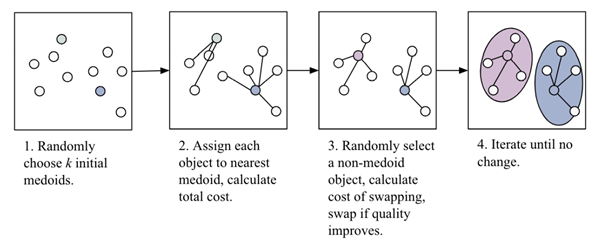


**Distance-based clustering method**

In cluster analysis, the fundamental information used is the similarity/dissimilarity matrix of n objects. In distance-based clustering, a similarity quantification between objects is based on the distance; more similar objects have a closer distance and vice versa. After the distance is defined, either a hierarchical or partitioning algorithm is applied. 
Common measurements to compute similarity/dissimilarity between objects are Euclidean, Manhattan, Mahalanobis, Minskowski, Canberra, Jacquard’s, simple matching, Dice index, Russel and Roa, and many more. However, few of these measurements are mean for mixed variables. Euclidean is the most popular measure and has been applied in most algorithms. Nevertheless, it is only suitable for numerical variables.
The approach to calculating a distance for the mixed variable data is via a combined distance function of the numerical and categorical distances. The combined distance function assumes an equal contribution of each variable. When the individual variables contribute differently in a subspace clustering domain, unequal weights in the Gower distance, which is the most common distance for a mixed variable dataset, can be applied the same as in this project. 

**Gower distance**

Gower’s dissimilarity is a method or distance measure that can handle a data set of various data types and allows missing values. In Gower’s dissimilarity measure, the dissimilarity between two observations is the weighted mean of the contributions of each variable


In [ ]:
%pip install gower==0.0.5
import gower

In [ ]:
%pip install pypi-install
%pip install scikit-learn-extra

In [ ]:
# PAM
from sklearn_extra.cluster import KMedoids

# Apply Gower distance calculation

gower_mat = gower.gower_matrix(customer_data,  cat_features = [True, True, True, False])
# Fit model
km_model = KMedoids(n_clusters = 3, random_state = 0, metric = 'precomputed', method = 'pam', init =  'k-medoids++').fit(gower_mat)  

clusters = km_model.labels_
clusters
np.unique(clusters)

array([0, 1, 2])

**Determining the Optimal Number of Clusters**

Determining the optimal number of clusters in a data set is a fundamental issue in partitioning clustering because it needs to be determined to perform the clustering. There exist plenty of different methods to determine the number of clusters, but in this project, the Silhouette analysis was used.

**Silhouette analysis**

A silhouette analysis is a multi-functional tool that can be used to determine the number of clusters, k, before the implementation of clustering algorithms (which is required for some algorithms). Another application of silhouette analysis is to assess the level of cluster separation, by measuring how close each point in a cluster is to the points in its neighbor cluster. 

*A rule of thumb is that cluster average S over 0.5 is acceptable.*

To determine the optimal number of clusters k, the average Silhouette method can be used. The optimal number of clusters k, is the one that maximizes the average silhouette score over a range of possible values for k. 

An advantage in using the Silhouette value for determining the number of clusters is that the silhouette can be calculated with any distance measure, and does not need access to the original data points.

This project initially started to fit PAM model to 3 clusters and find Silhouette score or Silhouette width (SW) by looping several clusters from 2 to 11 to determine the optimal number of clusters.



In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
km_model = KMedoids(n_clusters = 3, random_state = 0, metric = 'precomputed', method = 'pam', init =  'k-medoids++').fit(gower_mat)  
y_kmed = km_model.fit_predict(gower_mat)
silhouette_avg = silhouette_score(gower_mat, y_kmed)
print(silhouette_avg)

0.2540616


In [ ]:
sample_silhouette_values = silhouette_samples(customer_data_encoded, y_kmed)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

-0.07942548351629736
0.3115356410156333
0.11669119969597637


In [ ]:
# use Silhouette Width to find number of cluster
sw = []

for i in range(2, 11):
    km_model = KMedoids(n_clusters = i, random_state = 0, metric = 'precomputed', method = 'pam', init =  'k-medoids++').fit(gower_mat)  
    km_model.fit(gower_mat)
    y_kmed = km_model.fit_predict(gower_mat)
    silhouette_avg = silhouette_score(gower_mat, y_kmed)
    sw.append(silhouette_avg)

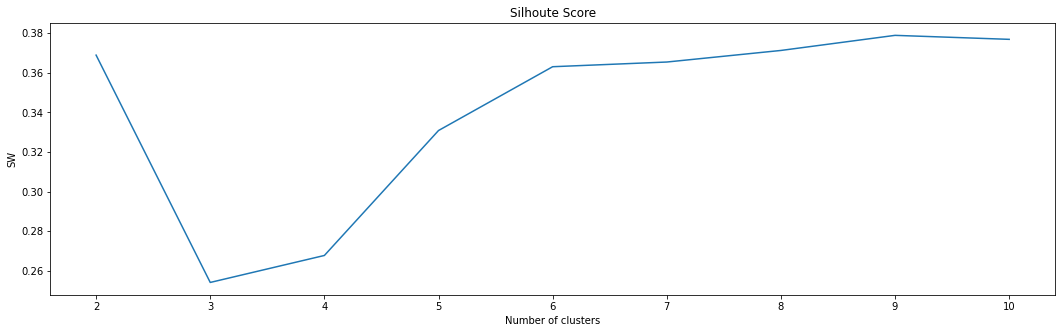

In [ ]:
plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show()

When testing with number of clusters equal to 13 and 20, the better Silhoutte widths were obtained, which were 0.409 and 0.495 respectively. 
This meaned that it may need more than 20 clusters to get statistically acceptable clustering which seems not much practical in real-world business application. Hence, this project used the results of 9 clusters for further summary and visualization. 

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
km_model = KMedoids(n_clusters = 13, random_state = 0, metric = 'precomputed', method = 'pam', init =  'k-medoids++').fit(gower_mat)  
y_kmed = km_model.fit_predict(gower_mat)
silhouette_avg = silhouette_score(gower_mat, y_kmed)
print(silhouette_avg)

0.4088908


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
km_model = KMedoids(n_clusters = 20, random_state = 0, metric = 'precomputed', method = 'pam', init =  'k-medoids++').fit(gower_mat)  
y_kmed = km_model.fit_predict(gower_mat)
silhouette_avg = silhouette_score(gower_mat, y_kmed)
print(silhouette_avg)

0.49517697


**Clustering to 9 clusters**

In [ ]:
# Fit model with no. of cluster = 9
km_model = KMedoids(n_clusters = 9, random_state = 0, metric = 'precomputed', method = 'pam', init =  'k-medoids++').fit(gower_mat)  

clusters = km_model.labels_
clusters
np.unique(clusters)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
print(clusters)

[2 7 8 ... 5 0 5]


In [ ]:
print(km_model.cluster_centers_)
print(km_model.inertia_)
print(km_model.medoid_indices_)

None
1145.5576
[4084 4096 5289   20 3657 3004   11   33  207]


In [ ]:
list = [4084, 4096, 5289, 20, 3657, 3004, 11, 33, 207]
for i in range(0,9):
  print(customer_data.iloc[list[i],:])

Gender                   Female
Profession           Healthcare
Spending_Score              Low
log_transform_age       4.80735
Name: 7231, dtype: object
Gender                     Male
Profession           Healthcare
Spending_Score              Low
log_transform_age       4.64386
Name: 7246, dtype: object
Gender                Female
Profession            Lawyer
Spending_Score          High
log_transform_age    6.18982
Name: 9322, dtype: object
Gender                Female
Profession            Artist
Spending_Score       Average
log_transform_age    5.55459
Name: 31, dtype: object
Gender                    Male
Profession           Executive
Spending_Score            High
log_transform_age      5.70044
Name: 6487, dtype: object
Gender                        Male
Profession           Entertainment
Spending_Score                 Low
log_transform_age          5.72792
Name: 5330, dtype: object
Gender                  Male
Profession            Artist
Spending_Score           Low
log_tra

**7. Experimental Results**

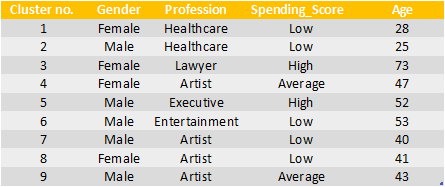

**8. Data visualization**

In this project, t-Distributed Stochastic Neighbor Embedding (t-SNE) and Principal Component Analysis (PCA) were used for data visualization. 

**t-Distributed Stochastic Neighbor Embedding (t-SNE)**

t-SNE is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. To keep things simple, here’s a brief overview of working of t-SNE:

•	The algorithms start by calculating the probability of similarity of points in high-dimensional space and calculating the probability of similarity of points in the corresponding low-dimensional space. The similarity of points is calculated as the conditional probability that a point A would choose point B as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian (normal distribution) centered at A.

•	It then tries to minimize the difference between these conditional probabilities (or similarities) in higher-dimensional and lower-dimensional space for a perfect representation of data points in lower-dimensional space.

•	To measure the minimization of the sum of the difference of conditional probability t-SNE minimizes the sum of Kullback-Leibler divergence of overall data points using a gradient descent method.

Note: Kullback-Leibler divergence or KL divergence is a measure of how one probability distribution diverges from a second, expected probability distribution.

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(customer_data_encoded)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8235 samples in 0.021s...
[t-SNE] Computed neighbors for 8235 samples in 0.274s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8235
[t-SNE] Computed conditional probabilities for sample 2000 / 8235
[t-SNE] Computed conditional probabilities for sample 3000 / 8235
[t-SNE] Computed conditional probabilities for sample 4000 / 8235
[t-SNE] Computed conditional probabilities for sample 5000 / 8235
[t-SNE] Computed conditional probabilities for sample 6000 / 8235
[t-SNE] Computed conditional probabilities for sample 7000 / 8235
[t-SNE] Computed conditional probabilities for sample 8000 / 8235
[t-SNE] Computed conditional probabilities for sample 8235 / 8235
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.274326
[t-SNE] KL divergence after 300 iterations: 1.447328


In [ ]:
tsne_results_table = pd.DataFrame(tsne_results)
gower_mat_table = pd.DataFrame(gower_mat)
clusters_table = pd.DataFrame(clusters)

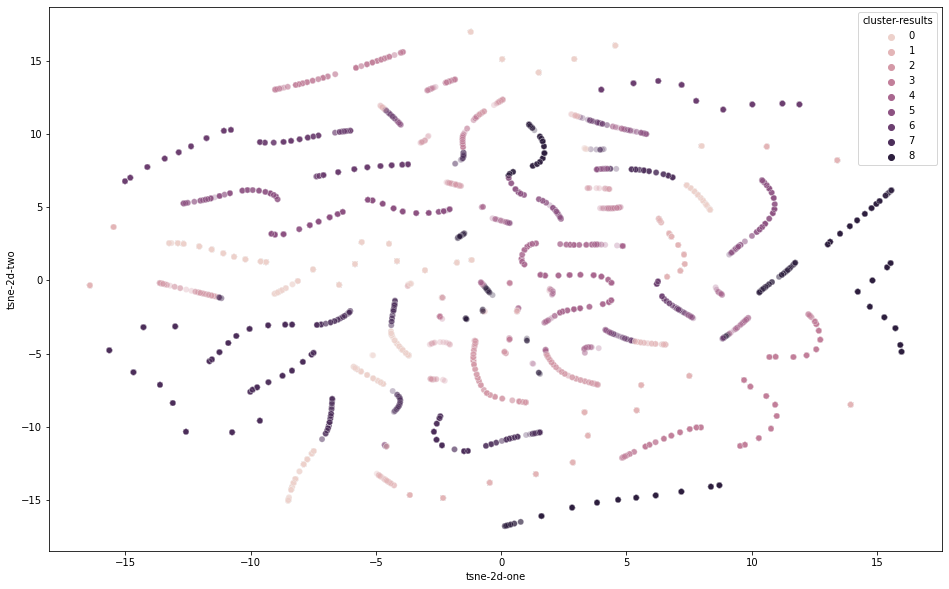

In [ ]:
#Visualization
gower_mat_table['tsne-2d-one'] = tsne_results_table.iloc[:,0]
gower_mat_table['tsne-2d-two'] = tsne_results_table.iloc[:,1]
gower_mat_table['cluster-results'] = clusters_table.iloc[:,0]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster-results",
    data=gower_mat_table,
    legend="full",
    alpha=0.3
)

**Principal Component Analysis (PCA)**

PCA is a linear feature extraction technique. It performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized. It does so by calculating the eigenvectors from the covariance matrix. The eigenvectors that correspond to the largest eigenvalues (the principal components) are used to reconstruct a significant fraction of the variance of the original data. 

**PCA vs. t-SNE**

Although both PCA and t-SNE have their advantages and disadvantages, some key differences between PCA and t-SNE can be noted as follows:

•	t-SNE is computationally expensive and can take several hours on million-sample datasets where PCA will finish in seconds or minutes.

•	PCA is a mathematical technique, but t-SNE is a probabilistic one.

•	Linear dimensionality reduction algorithms, like PCA, concentrate on placing dissimilar data points far apart in a lower dimension representation. But to represent high dimension data on the low dimension, non-linear manifold, similar data points must be represented close together, which is something t-SNE does not PCA.

•	Sometimes in t-SNE different runs with the same hyperparameters may produce different results hence multiple plots must be observed before making any assessment with t-SNE, while this is not the case with PCA.

•	Since PCA is a linear algorithm, it will not be able to interpret the complex polynomial relationship between features while t-SNE is made to capture exactly that.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(customer_data_encoded.values)
pca_result_table = pd.DataFrame(pca_result)
gower_mat_table['pca-one'] = pca_result_table.iloc[:,0]
gower_mat_table['pca-two'] = pca_result_table.iloc[:,1] 
gower_mat_table['pca-three'] = pca_result_table.iloc[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.84093217 0.09375179 0.03359149]


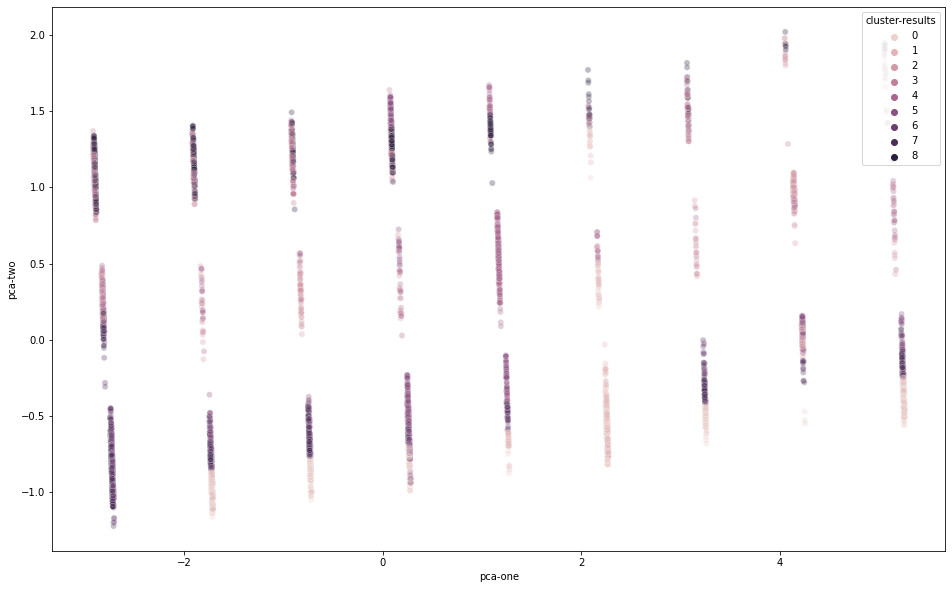

In [ ]:
# PCA 2-D
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="cluster-results",
    data=gower_mat_table,
    legend="full",
    alpha=0.3
)

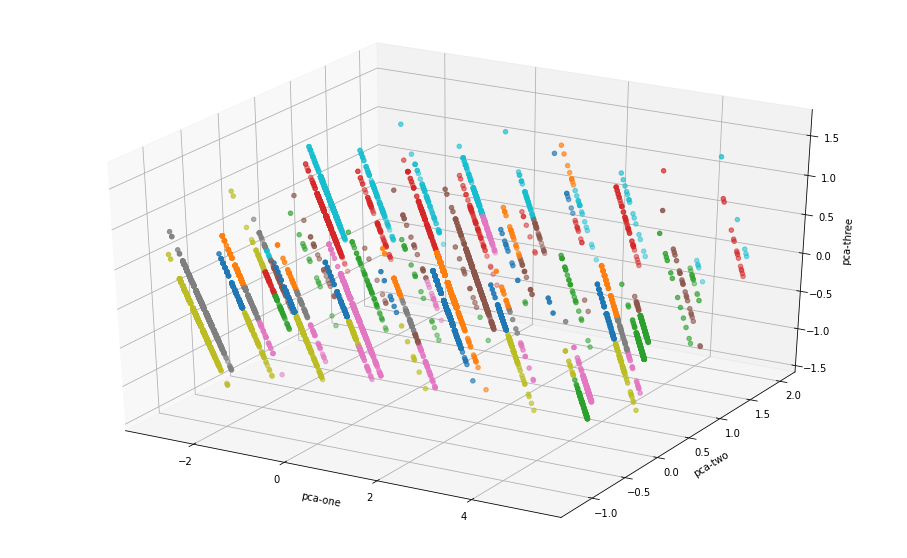

In [ ]:
# PCA 3-D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=gower_mat_table['pca-one'], 
    ys=gower_mat_table['pca-two'], 
    zs=gower_mat_table['pca-three'], 
    c=gower_mat_table['cluster-results'], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()